<a href="https://colab.research.google.com/github/TheLittleJimmy/CBB750/blob/main/Part1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

## Read Data into Dataframes

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [41]:
import pandas as pd

In [18]:
data_path='/content/drive/MyDrive/BIS550_CBB750/project/Code by message type.xlsx'
data_xl=pd.ExcelFile(data_path)
categories=data_xl.sheet_names  # get all sheet names/categories
print('\n'.join(categories))

Info Giving - Patient
Info Giving - Clinician
Info Giving - Auto
Info Seek - Clinician
Info Seek - Patient
Emotion - Patient
Emotion - Clinician
Partnership - Clinician
Partnership - Patient
SDM - Patient
SDM - Clinician


In [16]:
cat_msg={} # a dictionary that stores 'category name':dataframe
for cat in categories:
  cat_msg[cat]=pd.read_excel(data_xl,sheet_name=cat)

In [19]:
cat_msg['Info Giving - Auto'].head()

,Quotation Content,Codes
0,Appointment Information: Visit Type: MyChart V...,Auto
1,Appointment Information: Visit Type: Phone Con...,Auto
2,Appointment Information: Visit Type: Phone Con...,Auto
3,Appointment Information Department: at 6 Devin...,Auto
4,Appointment Information: Visit Type: Phone Con...,Auto


## Sequence Count and Length Visualization by Category

In [22]:
cat_seq_cnt={}
for cat in categories:
  cat_seq_cnt[cat]=cat_msg[cat].shape[0]
cat_seq_cnt

{'Info Giving - Patient': 62,
 'Info Giving - Clinician': 55,
 'Info Giving - Auto': 42,
 'Info Seek - Clinician': 3,
 'Info Seek - Patient': 58,
 'Emotion - Patient': 20,
 'Emotion - Clinician': 12,
 'Partnership - Clinician': 6,
 'Partnership - Patient': 12,
 'SDM - Patient': 2,
 'SDM - Clinician': 3}

In [36]:
def get_word_count(seq):
  return len(seq.split(' '))

In [40]:
cat_seq_len={}
for cat in categories:
  cat_seq_len[cat]=list(cat_msg[cat]["Quotation Content"].apply(get_word_count))

In [66]:
colors=["salmon","salmon","salmon","khaki","khaki","limegreen","limegreen","steelblue","steelblue","darkviolet","darkviolet"]
cat_color=dict(zip(categories,colors))

<ipython-input-68-dcf6b7e48708>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=cat_seq_cnt.keys(),rotation=90)


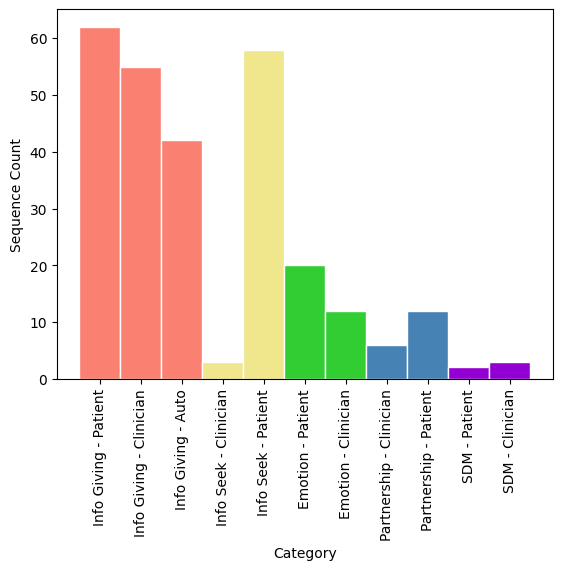

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(cat_seq_cnt.keys(), cat_seq_cnt.values(), width=1, edgecolor='white', color=cat_color.values())
ax.set_xticklabels(labels=cat_seq_cnt.keys(),rotation=90)
ax.set_xlabel("Category")
ax.set_ylabel("Sequence Count")
plt.show()

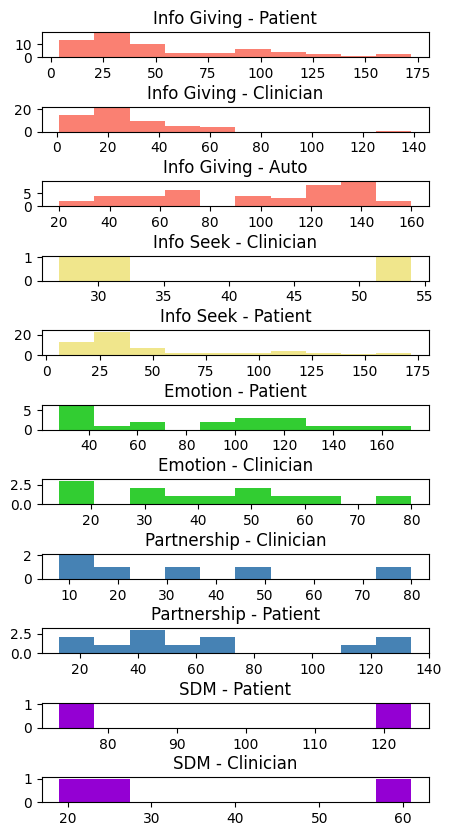

In [93]:
fig,axs=plt.subplots(len(categories),1,figsize=(5,10))
#fig.figsize=(20,10)
row=0
for cat in cat_seq_len.keys():
  axs[row].hist(cat_seq_len[cat],color=cat_color[cat])
  axs[row].set_title(cat)
  row+=1
#ax.set_xticklabels(labels=cat_seq_cnt.keys(),rotation=90)
#ax.set_xlabel("Category")
#ax.set_ylabel("Sequence Count")
plt.subplots_adjust(hspace=2)
#fig.suptitle("Sequence Length Distribution by Category")
plt.show()